# FMT Project

We will build a classifier to predict the Pass/Fail yield of a particular process entity and analyse whether all the
features are required to build the model or not.

**Importing modules for project**

In [102]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn import model_selection
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold  
from sklearn.model_selection import cross_val_score  
import warnings
warnings.filterwarnings("ignore")

**Import ‘signal-data.csv’ as DataFrame.**

In [103]:
df=pd.read_csv('signal-data1.csv')

In [104]:
df.head(5)

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


**Print 5 point summary and share at least 2 observations.**

In [105]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


there are null values in data.

there are outliers present in the data.

there are negitive values present in the data.

**Write a for loop which will remove all the features with 20%+ Null values and impute rest with mean of the feature.**

In [106]:
df.isnull().sum()*100/len(df)

Time         0.000000
0            0.382897
1            0.446713
2            0.893427
3            0.893427
               ...   
586          0.063816
587          0.063816
588          0.063816
589          0.063816
Pass/Fail    0.000000
Length: 592, dtype: float64

In [107]:
df['59'].isnull().sum()*100/len(df)

0.4467134652201659

In [108]:
for i in df:
    if (df[i].isnull().sum()*100/len(df[i])) > 0.20:
        df.drop([i], axis = 1,inplace = True)
df=df.fillna(df.mean())

In [109]:
df.isna().sum().sample(20)

526    0
249    0
239    0
22     0
558    0
559    0
11     0
588    0
439    0
182    0
32     0
527    0
589    0
222    0
307    0
447    0
586    0
388    0
361    0
144    0
dtype: int64

In [110]:
df.shape

(1567, 254)

null values are imputed.

**Identify and drop the features which are having same value for all the rows.**

In [111]:
df.nunique()

Time         1534
8            1209
9             569
10            393
11            379
             ... 
586           323
587           261
588           121
589           612
Pass/Fail       2
Length: 254, dtype: int64

In [112]:
nunique = df.nunique()
cols_to_drop = nunique[nunique == 1].index
df.drop(cols_to_drop, axis=1,inplace = True)

In [113]:
df.shape

(1567, 238)

columns having same values for all rows are deleted.

**Drop other features if required using relevant functional knowledge. Clearly justify the same**

There are hundreds of columns and only few have influence over the target variable. Rather than using all the attributes, choosing the ones that have high correlation with the target variable is better because using all attributes can increase the algorithm complexity

In [114]:
correlation_values=df.corr()['Pass/Fail']
correlation_values.abs().sort_values(ascending=False).head(20)

Pass/Fail    1.000000
103          0.151196
510          0.131587
431          0.120304
434          0.111609
430          0.109569
435          0.108573
21           0.107997
28           0.106767
436          0.106426
298          0.102055
163          0.099876
295          0.091831
160          0.089689
316          0.089410
164          0.087648
299          0.087634
300          0.084438
165          0.083866
294          0.081761
Name: Pass/Fail, dtype: float64

Choosing the attributes that have a correlation value of greater than 0.095

In [115]:
df2=df.copy(deep=True)
df2=df2[['Time','103','510','431','434','430','21','435','28','436','298','163','Pass/Fail']]

In [116]:
df2.head()

,Time,103,510,431,434,430,21,435,28,436,298,163,Pass/Fail
0,2008-07-19 11:55:00,-0.0042,64.6707,33.1562,10.0503,18.7673,-5419.00,2.7073,64.2333,3.1158,0.0373,0.090,-1
1,2008-07-19 12:32:00,-0.0045,141.4365,2.2655,8.6336,10.4383,-5441.50,5.7093,68.4222,1.6779,0.0502,0.112,-1
2,2008-07-19 13:17:00,-0.0026,240.7767,29.1663,14.2503,10.3162,-5447.75,5.7650,67.1333,0.8972,0.0800,0.187,1
3,2008-07-19 14:43:00,-0.0059,113.5593,13.4051,5.1760,15.7089,-5468.25,5.3899,62.9333,1.3671,0.0285,0.068,-1
4,2008-07-19 15:22:00,-0.0045,148.0663,10.7390,11.4064,12.7642,-5476.25,2.0088,62.8333,1.5533,0.0755,0.147,-1


**Check for multi-collinearity in the data and take necessary action**

In [117]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df2[['103','510','431','434','430','21','435','28','436','298','163']]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

   feature         VIF
0      103   19.176438
1      510    4.938043
2      431   11.161202
3      434  238.566414
4      430   15.256461
5       21  104.467516
6      435  206.857376
7       28  142.721944
8      436  192.070647
9      298  234.779917
10     163  295.614034


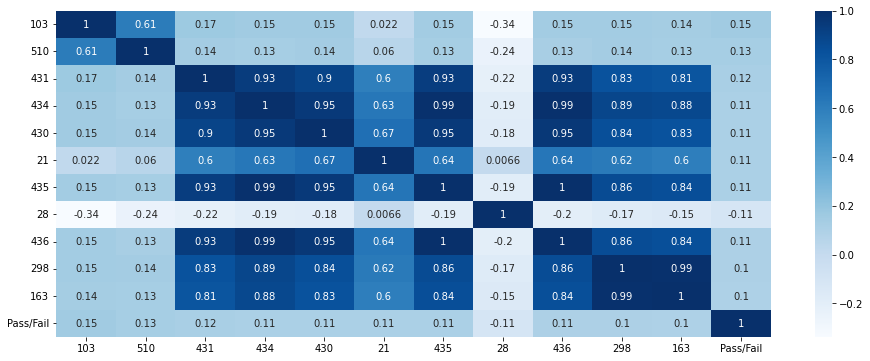

In [118]:
plt.figure(figsize=(16, 6))
sns.heatmap(df2.corr(), cmap="Blues", annot=True)
plt.show()

with VIF we found out that there is multicolinarity present in data.

we will take 10 as threshold value as we now 10 indicates clear multicolinarity.


In [119]:
correlation_values=df2.corr()['Pass/Fail']
correlation_values.abs().sort_values(ascending=False)

Pass/Fail    1.000000
103          0.151196
510          0.131587
431          0.120304
434          0.111609
430          0.109569
435          0.108573
21           0.107997
28           0.106767
436          0.106426
298          0.102055
163          0.099876
Name: Pass/Fail, dtype: float64

droping columns 163,298,436,28,435,21 as VIF is very high and they dont have that much influance on target varibale.


In [120]:
li=['163','436','298','28','434','21','435','430']
for i in li:
    df2.drop([i], axis = 1,inplace = True)

In [121]:
df2.head()

,Time,103,510,431,Pass/Fail
0,2008-07-19 11:55:00,-0.0042,64.6707,33.1562,-1
1,2008-07-19 12:32:00,-0.0045,141.4365,2.2655,-1
2,2008-07-19 13:17:00,-0.0026,240.7767,29.1663,1
3,2008-07-19 14:43:00,-0.0059,113.5593,13.4051,-1
4,2008-07-19 15:22:00,-0.0045,148.0663,10.7390,-1


In [122]:
X = df2[['103','510','431']]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

  feature       VIF
0     103  1.967049
1     510  2.076426
2     431  1.378084


multicolinarity looks under control.

**Make all relevant modifications on the data using both functional/logical reasoning/assumptions.**

removing time column as it does not priovide any useful feature in prediction.

In [123]:
df2.drop('Time',axis=1,inplace= True)

In [124]:
df2.head()

,103,510,431,Pass/Fail
0,-0.0042,64.6707,33.1562,-1
1,-0.0045,141.4365,2.2655,-1
2,-0.0026,240.7767,29.1663,1
3,-0.0059,113.5593,13.4051,-1
4,-0.0045,148.0663,10.7390,-1


In [125]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   103        1567 non-null   float64
 1   510        1567 non-null   float64
 2   431        1567 non-null   float64
 3   Pass/Fail  1567 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 49.1 KB


**Perform a detailed univariate Analysis with appropriate detailed comments after each analysis**

In [126]:
df2.dtypes

103          float64
510          float64
431          float64
Pass/Fail      int64
dtype: object

datatypes of individual variables is float and target variable is interger.

<AxesSubplot:xlabel='103', ylabel='Density'>

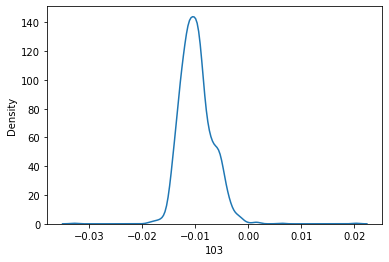

In [127]:
sns.kdeplot(df2['103'])

data is normally distrubuted for this column, there are outliers in column.

array([[<AxesSubplot:title={'center':'431'}>]], dtype=object)

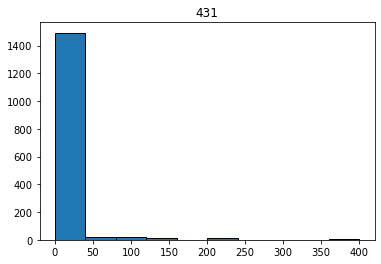

In [128]:
df2.hist(column="431",grid=False, edgecolor='black')

there are outliers.
distrubution of data is right skewed.

<AxesSubplot:xlabel='510'>

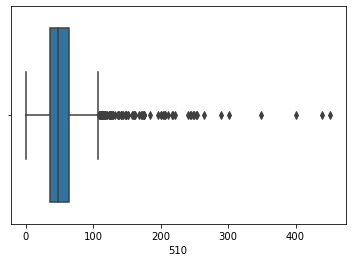

In [129]:
sns.boxplot(df2['510'])

Data is right skewed.

Outliers are present in data.

**Perform bivariate and multivariate analysis with appropriate detailed comments after each analysis.**

***Bivariate analysis***

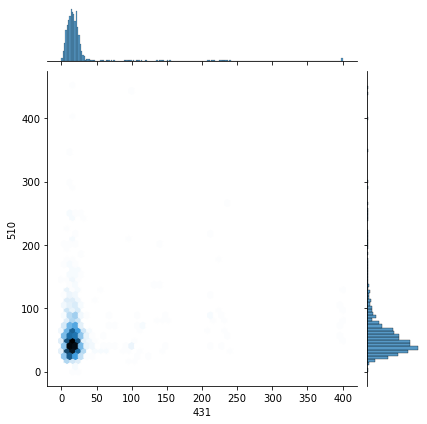

In [130]:
sns.jointplot(df2['431'],df2['510'], kind="hex")

data is skewed at on side for both coloumns, datapoints are concentrated at one point.

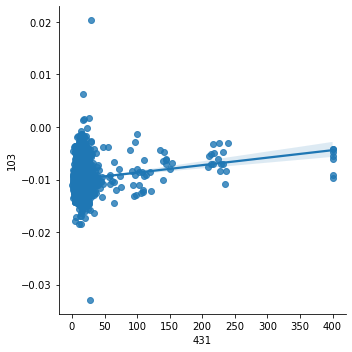

In [131]:
sns.lmplot(x='431', y='103', data=df2);

column 431 and 103 have positve relationship between them

***Multiivariate analysis***

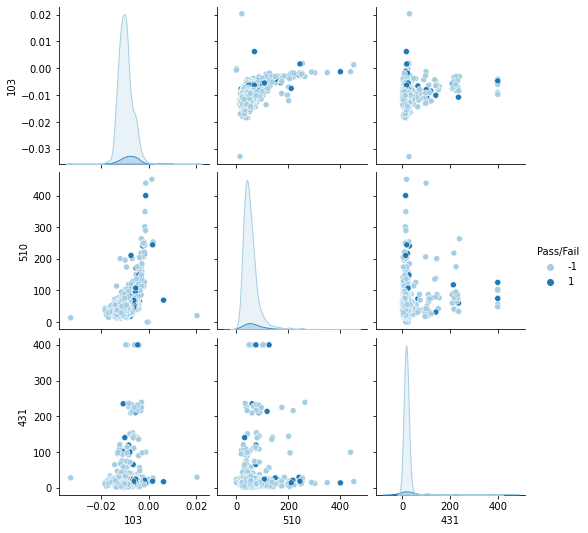

In [132]:
sns.pairplot(df2, hue='Pass/Fail' , diag_kind = 'kde', palette="Paired")

From the scatter plots it can be understood that there are no postive or negative trends, which means the variables are less dependent on each other.

Most of the attributes are either left or right skewed

**Segregate predictors vs target attributes.**

In [133]:
X=df2.drop(columns='Pass/Fail')

In [134]:
X.head()

,103,510,431
0,-0.0042,64.6707,33.1562
1,-0.0045,141.4365,2.2655
2,-0.0026,240.7767,29.1663
3,-0.0059,113.5593,13.4051
4,-0.0045,148.0663,10.7390


In [135]:
y=df2['Pass/Fail']
y.head()

0   -1
1   -1
2    1
3   -1
4   -1
Name: Pass/Fail, dtype: int64

**Check for target balancing and fix it if found imbalanced.**

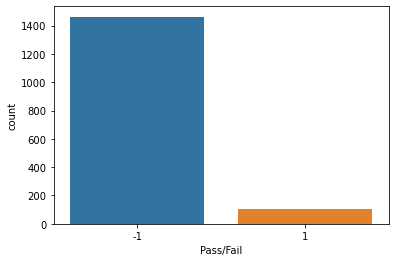

In [136]:
sns.countplot(x ='Pass/Fail', data = df2)
plt.show()

There is imbalance in data as there are more -1 datapoint then 1.

In [137]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC

In [138]:
df2.groupby(["Pass/Fail"]).count()

,103,510,431
Pass/Fail,,,
-1,1463,1463,1463
1,104,104,104


In [139]:
X=X.to_numpy()
y=y.to_numpy()


type(X)

numpy.ndarray

In [140]:
print("Before UpSampling, counts of label '1': {}".format(sum(y==1)))
print("Before UpSampling, counts of label '-1': {} \n".format(sum(y==-1)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X, y = sm.fit_resample(X, y.ravel())


print("After UpSampling, counts of label '1': {}".format(sum(y==1)))
print("After UpSampling, counts of label '-1': {} \n".format(sum(y==-1)))



print('After UpSampling, the shape of X: {}'.format(X.shape))
print('After UpSampling, the shape of y: {} \n'.format(y.shape))

Before UpSampling, counts of label '1': 104
Before UpSampling, counts of label '-1': 1463 

After UpSampling, counts of label '1': 1463
After UpSampling, counts of label '-1': 1463 

After UpSampling, the shape of X: (2926, 3)
After UpSampling, the shape of y: (2926,) 



After oversampling data we have balanced classes of target variable

In [141]:
Xdf=pd.DataFrame(X, columns = ['103','510','431'])

In [142]:
Xdf.head()

,103,510,431
0,-0.0042,64.6707,33.1562
1,-0.0045,141.4365,2.2655
2,-0.0026,240.7767,29.1663
3,-0.0059,113.5593,13.4051
4,-0.0045,148.0663,10.7390


**Perform train-test split and standardise the data or vice versa if required**

In [143]:
x=Xdf.apply(zscore)

In [144]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=5)

In [145]:
X_train.head()

,103,510,431
1772,-0.761558,-0.532923,-0.186110
343,0.720927,0.747279,-0.071879
7,1.032038,0.342431,-0.288445
1615,-0.486716,-0.635719,1.854298
894,-1.425735,-0.746378,-0.146012


**Check if the train and test data have similar statistical characteristics when compared with original data.**

<AxesSubplot:xlabel='103', ylabel='Proportion'>

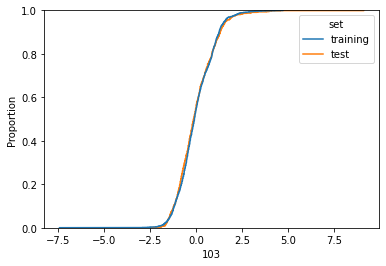

In [157]:
feature_name = '103'

df = pd.DataFrame({
    feature_name:np.concatenate((X_train.loc[:,feature_name],X_test.loc[:,feature_name])),
    'set':['training']*X_train.shape[0] + ['test']*X_test.shape[0]
    })
sns.ecdfplot(data=df,x=feature_name,hue='set')

In [148]:
from scipy.stats import ks_2samp
ks_2samp(X_train.loc[:,feature_name],X_test.loc[:,feature_name]).statistic

0.039945632830296125

We can se that there is almost no difference between two graphs that suggests that there is no disturbance between two sets.

Distance is also low, this means test and train resambles original data.

**Use any Supervised Learning technique to train a model**

In [46]:
KNN = KNeighborsClassifier(n_neighbors= 5 , metric = 'euclidean' ) #Building knn with 5 neighbors

In [47]:
KNN.fit(X_train, y_train)
predicted_labels = KNN.predict(X_test)
predictedlabels = KNN.predict(X_train)

In [48]:
print('Accuracy on Test data:',KNN.score(X_test, y_test))

Accuracy on Test data: 0.7517084282460137


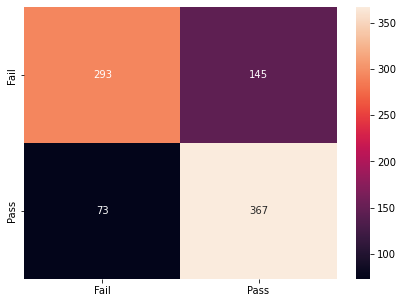

In [49]:
cm = confusion_matrix(y_test, predicted_labels, labels=[-1, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["Fail","Pass"]],
                  columns = [i for i in ["Fail","Pass"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

In [50]:
print("classification  Matrix of test data:\n",classification_report(y_test,predicted_labels))

classification  Matrix of test data:
               precision    recall  f1-score   support

          -1       0.80      0.67      0.73       438
           1       0.72      0.83      0.77       440

    accuracy                           0.75       878
   macro avg       0.76      0.75      0.75       878
weighted avg       0.76      0.75      0.75       878



**Use cross validation techniques**

***Kfold validation***

In [51]:
X_traincv, X_testcv, y_traincv, y_testcv = train_test_split(x, y, test_size=0.30, random_state=5)

In [52]:
from sklearn.model_selection import cross_val_score,KFold

kf=KFold(n_splits=5,random_state=7,shuffle=True)
score=cross_val_score(KNN,X_traincv,y_traincv,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.75609756 0.70731707 0.78536585 0.73594132 0.74327628]
Average Cross Validation score :0.7455996183433717


***Stratified K-Fold Cross-Validation***

In [53]:
from sklearn.model_selection import cross_val_score,StratifiedKFold

stratifiedkf=StratifiedKFold(n_splits=5)
score=cross_val_score(KNN,X_traincv,y_traincv,cv=stratifiedkf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.74634146 0.74878049 0.75121951 0.74572127 0.74572127]
Average Cross Validation score :0.747556801240384


***Leave one Out cross-validation***

In [54]:
from sklearn.model_selection import LeaveOneOut,cross_val_score

loo=LeaveOneOut()
score=cross_val_score(KNN,X_traincv,y_traincv,cv=loo)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [1. 0. 0. ... 1. 1. 1.]
Average Cross Validation score :0.76513671875


***Shuffle Split***

In [55]:
from sklearn.model_selection import ShuffleSplit,cross_val_score

shuffle_split=ShuffleSplit(test_size=0.3,train_size=0.5,n_splits=10)
score=cross_val_score(KNN,X_traincv,y_traincv,cv=shuffle_split)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.72195122 0.70081301 0.69593496 0.70406504 0.69756098 0.70569106
 0.7203252  0.72357724 0.7398374  0.72682927]
Average Cross Validation score :0.7136585365853658


***Time Series Cross-Validation***

In [56]:
from sklearn.model_selection import TimeSeriesSplit

time_series = TimeSeriesSplit()
score=cross_val_score(KNN,X_traincv,y_traincv,cv=time_series)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.6627566  0.72434018 0.71554252 0.73607038 0.74193548]
Average Cross Validation score :0.7161290322580646


**Apply hyper-parameter tuning techniques to get the best accuracy.**

***Gridsearchcv***

In [57]:
k_range = list(range(2,10))
weight_options = ["uniform", "distance"]
met = ['euclidean','manhattan']
algo=['auto', 'ball_tree', 'kd_tree' , 'brute']
param_grid = dict(n_neighbors = k_range, weights = weight_options,metric= met,algorithm=algo)
knn = KNeighborsClassifier()

In [58]:
grid = GridSearchCV(knn, param_grid, cv = 10, scoring = 'accuracy')
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [59]:
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.7978503108560497
{'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')


we are geting 89% accuracy after cross validation.

***Randomizedsearch***

In [60]:
k_range = list(range(2,10))
weight_options = ["uniform", "distance"]
met = ['euclidean','manhattan']
algo=['auto', 'ball_tree', 'kd_tree' , 'brute']
param_grid = dict(n_neighbors = k_range, weights = weight_options,metric= met,algorithm=algo)
#print (param_grid)
knnr = KNeighborsClassifier()

In [61]:
gridr = RandomizedSearchCV(knnr, param_grid, cv = 10, scoring = 'accuracy',n_iter=10, random_state=5)
gridr.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'metric': ['euclidean', 'manhattan'],
                                        'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9],
                                        'weights': ['uniform', 'distance']},
                   random_state=5, scoring='accuracy')

In [62]:
print (gridr.best_score_)
print (gridr.best_params_)
print (gridr.best_estimator_)

0.7978503108560497
{'weights': 'distance', 'n_neighbors': 3, 'metric': 'manhattan', 'algorithm': 'kd_tree'}
KNeighborsClassifier(algorithm='kd_tree', metric='manhattan', n_neighbors=3,
                     weights='distance')


computation time is low but accuracy we get is lower then what we got in Gridsearch.

In [63]:
knn = KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights ='distance', algorithm='auto')
knn.fit(X_train,y_train)
preds =knn.predict(X_test)
print('Accuracy on Test data:',knn.score(X_test, y_test) )

Accuracy on Test data: 0.785876993166287


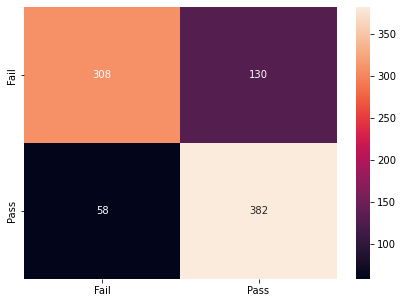

In [64]:
cm = confusion_matrix(y_test, preds, labels=[-1, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["Fail","Pass"]],
                  columns = [i for i in ["Fail","Pass"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

In [65]:
print("classification  Matrix of test data:\n",classification_report(y_test,preds))

classification  Matrix of test data:
               precision    recall  f1-score   support

          -1       0.84      0.70      0.77       438
           1       0.75      0.87      0.80       440

    accuracy                           0.79       878
   macro avg       0.79      0.79      0.78       878
weighted avg       0.79      0.79      0.78       878



After hyperparameter tunning with grid search we increase the accuracy of model from 75% to 80%.

**Use any other technique/method which can enhance the model performance**

Performing Dimensionality reduction using PCA.

In [66]:
df.isnull().sum()

Time         0
8            0
9            0
10           0
11           0
            ..
586          0
587          0
588          0
589          0
Pass/Fail    0
Length: 238, dtype: int64

selecting columns who have more than 0.095% corrleation with target variable.

In [67]:
x1=df[['103','510','431','434','430','21','435','28','436','298','163']]
y1=df[['Pass/Fail']]

In [68]:
x1=x1.apply(zscore)

standardizing data

In [69]:
covMatrix = np.cov(x,rowvar=False)

In [70]:
pca = PCA(n_components=11)
pca.fit(x1)

PCA(n_components=11)

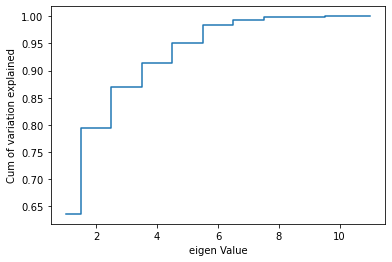

In [71]:
plt.step(list(range(1,12)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

around 9 componentsmore than 95% of variaiation is explained, so we will take 6 components.

In [72]:
pca2 = PCA(n_components=6)
pca2.fit(x1)
print(pca2.components_)
print(pca2.explained_variance_ratio_)
xpca = pca2.transform(x1)

[[ 0.07576344  0.07003021  0.35529474  0.37148225  0.36239423  0.26622454
   0.36926067 -0.08483217  0.3689092   0.35118332  0.34632861]
 [ 0.64128262  0.61017722 -0.01099053 -0.0395966  -0.03773964 -0.14545385
  -0.0411112  -0.43111989 -0.03862304 -0.03591124 -0.04283376]
 [ 0.21263664  0.42341145 -0.0677926  -0.03650135 -0.00347205  0.27814436
  -0.03139163  0.82949635 -0.04391197  0.02381577  0.02566687]
 [-0.09938372  0.05157297 -0.12550542 -0.13575968  0.00138244  0.89267628
  -0.09838589 -0.31754358 -0.10129763 -0.11776039 -0.14753144]
 [ 0.54660294 -0.4751191   0.16473848  0.09332448  0.15011307  0.08553203
   0.15845147  0.13132473  0.16625221 -0.39587822 -0.42787471]
 [ 0.47840973 -0.46348234 -0.19595173 -0.12939494 -0.18385081  0.11848902
  -0.19720232  0.007471   -0.20994803  0.41529205  0.44478884]]
[0.6360269  0.15864751 0.07513046 0.04498827 0.03517246 0.03348159]


In [73]:
y1=y1.to_numpy()


type(xpca)


numpy.ndarray

In [74]:
print("Before UpSampling, counts of label '1': {}".format(sum(y1==1)))
print("Before UpSampling, counts of label '-1': {} \n".format(sum(y1==-1)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_res, y_train_res = sm.fit_resample(xpca, y1.ravel())


print("After UpSampling, counts of label '1': {}".format(sum(y1==1)))
print("After UpSampling, counts of label '-1': {} \n".format(sum(y1==-1)))



print('After UpSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

Before UpSampling, counts of label '1': [104]
Before UpSampling, counts of label '-1': [1463] 

After UpSampling, counts of label '1': [104]
After UpSampling, counts of label '-1': [1463] 

After UpSampling, the shape of train_X: (2926, 6)
After UpSampling, the shape of train_y: (2926,) 



In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size=0.30, random_state=5)

buliding knn model with pca

In [76]:
KNN = KNeighborsClassifier(n_neighbors= 5 , metric = 'euclidean' ) #Building knn with 5 neighbors

In [77]:
KNN.fit(X_train, y_train)
predicted_labels = KNN.predict(X_test)
predictedlabels = KNN.predict(X_train)

In [78]:
print('Accuracy on Test data:',KNN.score(X_test, y_test) )

Accuracy on Test data: 0.8348519362186788


accuracy is good performing gridsearch for hyperparameter tunning.

In [79]:
k_range = list(range(2,10))
weight_options = ["uniform", "distance"]
met = ['euclidean','manhattan']
algo=['auto', 'ball_tree', 'kd_tree' , 'brute']
param_grid = dict(n_neighbors = k_range, weights = weight_options,metric= met,algorithm=algo)
knn = KNeighborsClassifier()

In [80]:
grid = GridSearchCV(knn, param_grid, cv = 10, scoring = 'accuracy')
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [81]:
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.8891726446676232
{'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'uniform'}
KNeighborsClassifier(metric='euclidean', n_neighbors=2)


In [82]:
knn = KNeighborsClassifier(metric='euclidean', n_neighbors=2, weights ='uniform', algorithm='auto')
knn.fit(X_train,y_train)
preds =knn.predict(X_test)
print('Accuracy on Test data:',knn.score(X_test, y_test) )

Accuracy on Test data: 0.8906605922551253


**Display and explain the classification report in detail.**

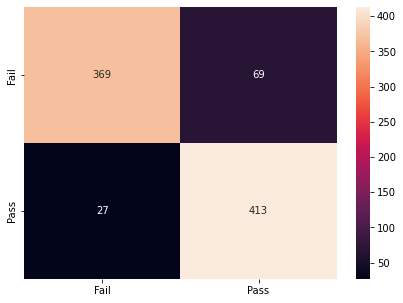

In [83]:
cm = confusion_matrix(y_test, preds, labels=[-1, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["Fail","Pass"]],
                  columns = [i for i in ["Fail","Pass"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

In [84]:
print("classification  Matrix of test data:\n",classification_report(y_test,preds))

classification  Matrix of test data:
               precision    recall  f1-score   support

          -1       0.93      0.84      0.88       438
           1       0.86      0.94      0.90       440

    accuracy                           0.89       878
   macro avg       0.89      0.89      0.89       878
weighted avg       0.89      0.89      0.89       878



After Dimensionality reduction balancing target variable and hyperparameter tunning we increase the accuracy of knn model.

recall is incresed for minor class.

f1 score is also improved.

**Apply the above steps for all possible models that you have learnt so far**

In [85]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)
print (logreg_cv.best_estimator_)

tuned hpyerparameters :(best parameters)  {'C': 10.0, 'penalty': 'l2'}
accuracy : 0.6562338593974175
LogisticRegression(C=10.0)


In [86]:
LR=LogisticRegression(C= 10, penalty= 'l2')
LR.fit(X_train,y_train)
pllr = LR.predict(X_test)
pllrt=LR.predict(X_train)
srlr=LR.score(X_test, y_test)
print("Accuracy of logistic regression",srlr*100)

Accuracy of logistic regression 67.3120728929385


In [87]:
GN=GaussianNB()
GN.fit(X_train,y_train)
plgn = GN.predict(X_test)
plgnt = GN.predict(X_train)
srgn=GN.score(X_test, y_test)
print("Accuracy of GB",srgn*100)

Accuracy of GB 56.03644646924829


In [88]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
svm=SVC()
svmg = GridSearchCV(svm, param_grid, refit = True, verbose = 3)
svmg.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.722 total time=   0.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.734 total time=   0.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.724 total time=   0.2s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.758 total time=   0.2s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.729 total time=   0.2s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.671 total time=   0.3s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.680 total time=   0.2s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.649 total time=   0.2s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.680 total time=   0.2s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.650 total time=   0.2s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.656 total time=   0.2s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.905 total time=   0.2s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.861 total time=   0.2s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.914 total time=   0.2s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.822 total time=   0.9s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.822 total time=   0.7s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.815 total time=   0.8s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.817 total time=   0.6s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.834 total time=   1.1s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.698 total time=   0.4s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.698 total time=   0.5s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.676 total time=   0.5s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.704 total time=   0.3s
[CV 5/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [89]:
print(svmg.best_params_)
print(svmg.best_estimator_)
print("accuracy :",svmg.best_score_)

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=100, gamma=1)
accuracy : 0.9057642077643271


In [90]:
SVM = SVC(C=100, gamma=1)
SVM.fit(X_train,y_train)
plsvm = SVM.predict(X_test)
plsvmt = SVM.predict(X_train)
srsvm=SVM.score(X_test, y_test)
print("Accuracy of SVM",srsvm*100)

Accuracy of SVM 90.7744874715262


In [91]:
criterion = ['gini', 'entropy']
maxd = list(range(2,10))
splitter= ['best','random']
param_grid = dict(criterion = criterion, max_depth=maxd,splitter=splitter )
DT = DecisionTreeClassifier()
griddt = GridSearchCV(DT, param_grid, cv = 10, scoring = 'accuracy')
griddt.fit(X_train,y_train)
print (griddt.best_score_)
print (griddt.best_params_)
print (griddt.best_estimator_)

0.7773696795791487
{'criterion': 'gini', 'max_depth': 9, 'splitter': 'best'}
DecisionTreeClassifier(max_depth=9)


In [92]:
DT = DecisionTreeClassifier(criterion ='gini',max_depth=9)
DT.fit(X_train, y_train)
pldt = DT.predict(X_test)
pldtt = DT.predict(X_train)
srdt=DT.score(X_test, y_test)
print("Accuracy of DT",srdt*100)

Accuracy of DT 75.62642369020502


In [93]:
criterion = ['gini', 'entropy']
maxd = list(range(2,10))
param_grid = dict(criterion = criterion, max_depth=maxd)
RST = RandomForestClassifier()
gridrst = GridSearchCV(RST, param_grid, cv = 10, scoring = 'accuracy')
gridrst.fit(X_train,y_train)
print (gridrst.best_score_)
print (gridrst.best_params_)
print (gridrst.best_estimator_)

0.8428000956480153
{'criterion': 'gini', 'max_depth': 9}
RandomForestClassifier(max_depth=9)


In [94]:
RST = RandomForestClassifier(criterion='gini', max_depth=9)
RST.fit(X_train, y_train)
plrst = RST.predict(X_test)
plrstt = RST.predict(X_train)
srrst=RST.score(X_test, y_test)
print("Accuracy of RST",srrst*100)

Accuracy of RST 83.7129840546697


from all models we see that SVM is giving the best accuracy on test data.

**Display and compare all the models designed with their train and test accuracies.**

In [95]:
data = {'model': ['LR', 'Gaussian','KNN','SVC', 'DT','RST'],
        'training acc': [LR.score(X_train, y_train),GN.score(X_train, y_train),knn.score(X_train, y_train),SVM.score(X_train, y_train),DT.score(X_train, y_train),RST.score(X_train, y_train)],
       'testing acc': [LR.score(X_test, y_test),GN.score(X_test, y_test),knn.score(X_test, y_test),SVM.score(X_test, y_test),DT.score(X_test, y_test),RST.score(X_test, y_test)]}
com = pd.DataFrame(data)
com

,model,training acc,testing acc
0,LR,0.657715,0.673121
1,Gaussian,0.563965,0.560364
2,KNN,0.984375,0.890661
3,SVC,0.990234,0.907745
4,DT,0.856445,0.756264
5,RST,0.938477,0.837130


as we can see that SVC has the best accuracy for both training and testing data.

KNN has second best accuracy for training and testing data.

Gaussian NB is the worst performing model for the data.

**Select the final best trained model along with your detailed comments for selecting this model.**

selecting SVC as the final model.

In [96]:
SVM = SVC(C=100, gamma=1)
SVM.fit(X_train,y_train)
plsvm = SVM.predict(X_test)
plsvmt = SVM.predict(X_train)
srsvm=SVM.score(X_test, y_test)
print("Accuracy of SVM",srsvm*100)

Accuracy of SVM 90.7744874715262


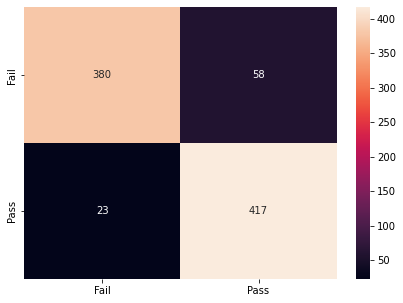

In [97]:
cm = confusion_matrix(y_test, plsvm, labels=[-1, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["Fail","Pass"]],
                  columns = [i for i in ["Fail","Pass"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

In [98]:
print("classification  Matrix of test data:\n",classification_report(y_test,plsvm))

classification  Matrix of test data:
               precision    recall  f1-score   support

          -1       0.94      0.87      0.90       438
           1       0.88      0.95      0.91       440

    accuracy                           0.91       878
   macro avg       0.91      0.91      0.91       878
weighted avg       0.91      0.91      0.91       878



Selecting SVC because it has high precision value for both classes.

recall value is also great.

false postives and negitves are very low with SVC.



**Pickle the selected model for future use.**

In [99]:
import pickle
filename = 'model'
outfile = open(filename,'wb')# making pickle file for best model
pickle.dump(svm,outfile)
outfile.close()

In [100]:
infile = open(filename,'rb')
ndic=pickle.load(infile)
print("loading data from pickle file for best model \n",ndic)

loading data from pickle file for best model 
 SVC()


In [101]:
infile.close()

**Write your conclusion on the results.**

After testing data on all supervised learning model we conclude that for this data SVC is the best model to predict the future data.

Best parameters for the model are kernel=rbf,C=100, gamma=1.

